# **SpaceX  Falcon 9 First Stage Landing Prediction**


 ## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


>In this assignment, we will predict if the **Falcon 9 first stage** will **land successfully**.

**`SpaceX`** advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because SpaceX can **reuse the first stage**.

>*Therefore if we can determine **if the first stage will land**, we can determine the **cost of a launch**.*

This information can be used if an alternate company wants to **bid against SpaceX** for a rocket launch.


In this lab, we will perform **Exploratory Data Analysis** and **Feature Engineering**.

Example of a **successful launch** $\rightarrow$

![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)



Example of an **unsuccessful launch** $\rightarrow$

![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


**NOTE**: Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans. 

---

# Objectives
1. **Exploratory Data Analysis**
    - using `Pandas`, `Matplotlib` and `Seaborn`
2. **Feature Engineering**
    - Prepare the data
    - Transform the data

----


### Import Libraries and Define Auxiliary Functions


In [1]:
# for data manipulation
import pandas as pd

# for numerical computations & array manipulation
import numpy as np

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis 


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [2]:
# local file path
local_path = r"D:\IBM Professional Certification\10_Data Science Capstone Project\4_EDA with Visualization\data\dataset_part_2.csv"

In [3]:
# load dataset
df = pd.read_csv(local_path)

In [4]:
# check first five rows of dataframe
df.head(5)

FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      0  
1            0  B0005  -80.577366  28.561857      0  
2            0  B0007  -80.577366  28.561857      0  
3            0  B1003 -120.610829  34.632093      0  
4            0  B1004  -80.577366  28.561857      0

First, let's try to see how the `FlightNumber` (_indicating the continuous launch attempts_) and `Payload` variables would affect the `launch outcome`.

We can plot out the `FlightNumber` vs. `PayloadMass` and overlay the `outcome` of the launch.

#### NOTE:
>**Higher `FlightNumber`** indicates that much **more experience** of **Falcon 9** booster in launching payload and landing back the first stage of the rocket.

C:\Users\rayjo\AppData\Local\Temp\ipykernel_6892\2289663923.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=ax.get_yticklabels(), size=20)
C:\Users\rayjo\AppData\Local\Temp\ipykernel_6892\2289663923.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=ax.get_xticklabels(), size=20)


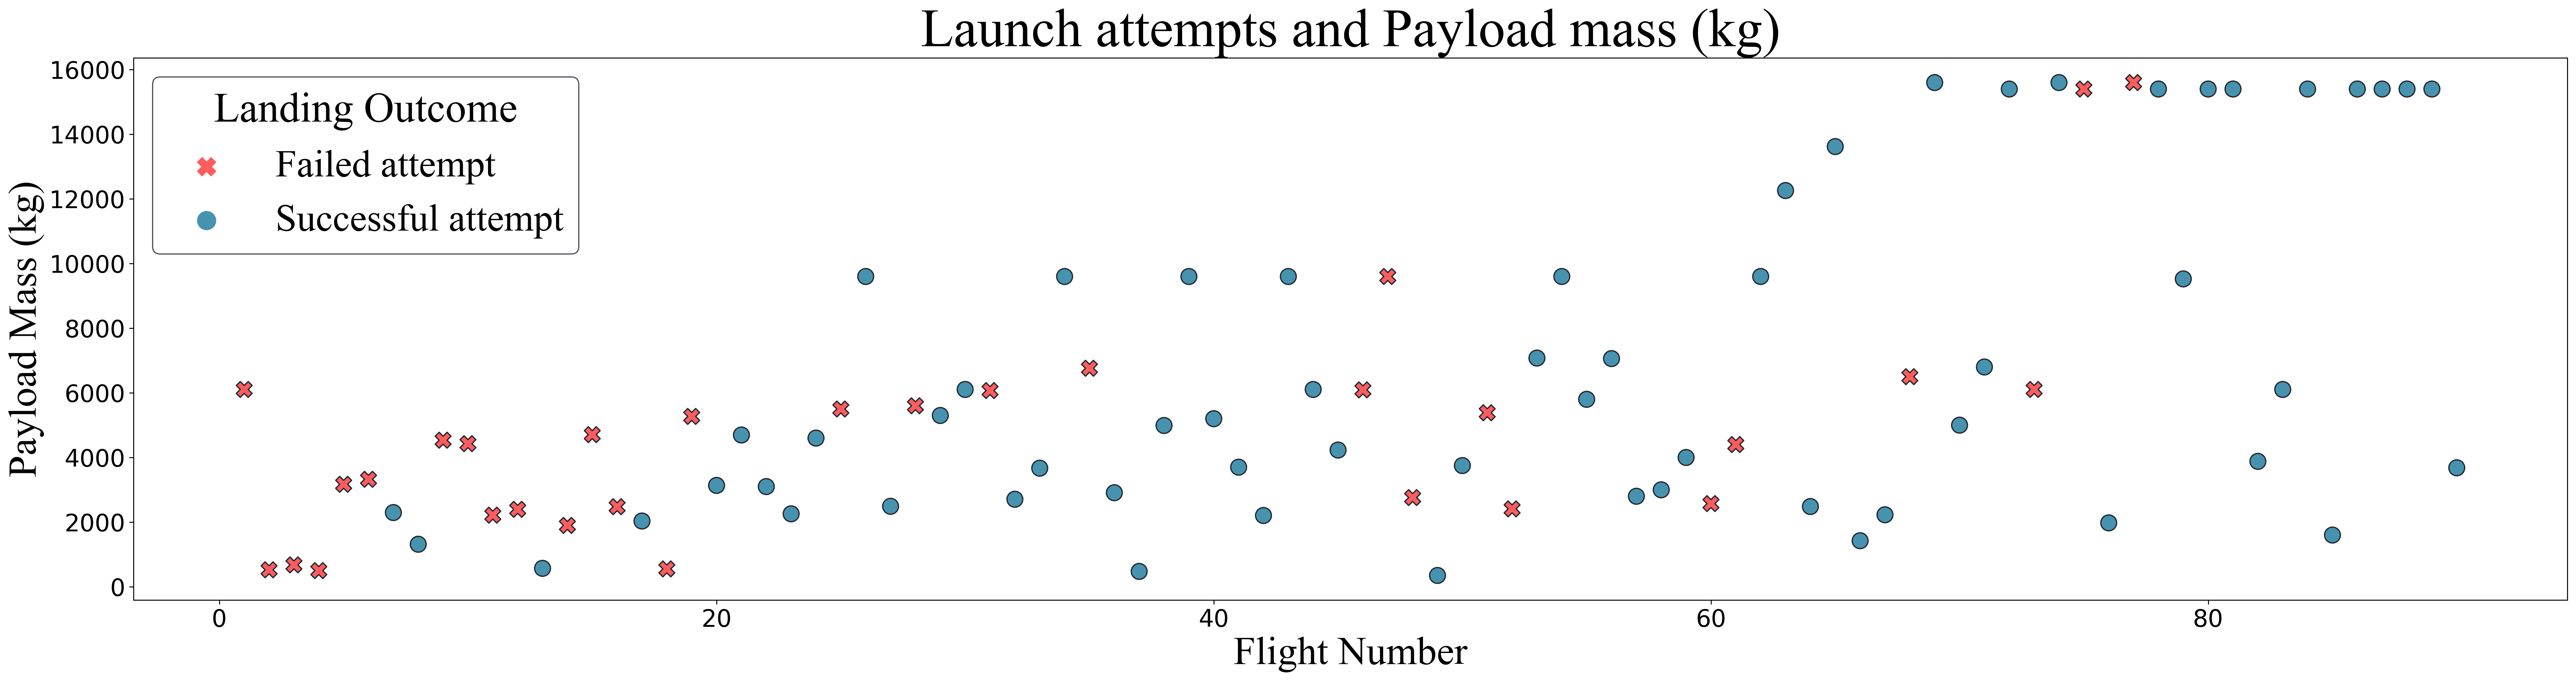

In [8]:
fig, ax = plt.subplots(figsize=(30, 8), dpi=280)

# customizations
    ## font
axis_font = dict(size=33, family="times new roman")
legend_font = dict(size=32, family="times new roman")
legend_title_font = dict(size=35, family="times new roman")
title_font = dict(size=45, family="times new roman")
    ## colors
colors = {0:"#FF5D5D", 1:"#4793AF"}
    ## marker
markers = ["X", "o"]
    ## legend labels
hue_labels = {"0":"Failed attempt", "1":"Successful attempt"}


# plot
sns.scatterplot(data=df, x="FlightNumber", y="PayloadMass",
               hue="Class", style="Class", ax=ax,
               markers=markers, palette=colors, s=175,
               edgecolor="#222831")

# axis labels
ax.set_xlabel("Flight Number", fontdict=axis_font)
ax.set_ylabel("Payload Mass (kg)", fontdict=axis_font)

# axis ticks
ax.set_yticklabels(labels=ax.get_yticklabels(), size=20)
ax.set_xticklabels(labels=ax.get_xticklabels(), size=20)

# plot legend
legend = ax.legend(markerscale=2.5, prop=legend_font,
         title="Landing Outcome", title_fontproperties=legend_title_font,
                  frameon=True, edgecolor="#222831")
legend_labels = [hue_labels[label.get_text()] for label in legend.get_texts()] ## custom legend labels
for text, label in zip(legend.get_texts(), legend_labels): ## legend.get_texts() -> list of auto generated legend labels 
    text.set_text(label) ## change the legend label (from the auto generated one) to the custom legend label

# plot title
ax.set_title("Launch attempts and Payload mass (kg)",
            fontdict=title_font)

fig.tight_layout();

# rname = r"D:\IBM Professional Certification\10_Data Science Capstone Project\4_EDA with Visualization\plots"
# fig.savefig(fname=rname+r"\flightNumber_payloadMass.jpeg", bbox_inches="tight")

#### Observations
1. As the **`flight number` increases**, the first stage is **more likely to land successfully**.
2. `Payload mass` is also important; it seems the **more massive the payload**, the **relatively less likely the first stage will return**.

Next, let's drill down to each site visualize its detailed launch records.

---

### TASK 1: Visualize the relationship between Flight Number and Launch Site

Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


C:\Users\rayjo\AppData\Local\Temp\ipykernel_6892\3277837596.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=ax.get_yticklabels(), size=20)
C:\Users\rayjo\AppData\Local\Temp\ipykernel_6892\3277837596.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=ax.get_xticklabels(), size=20)


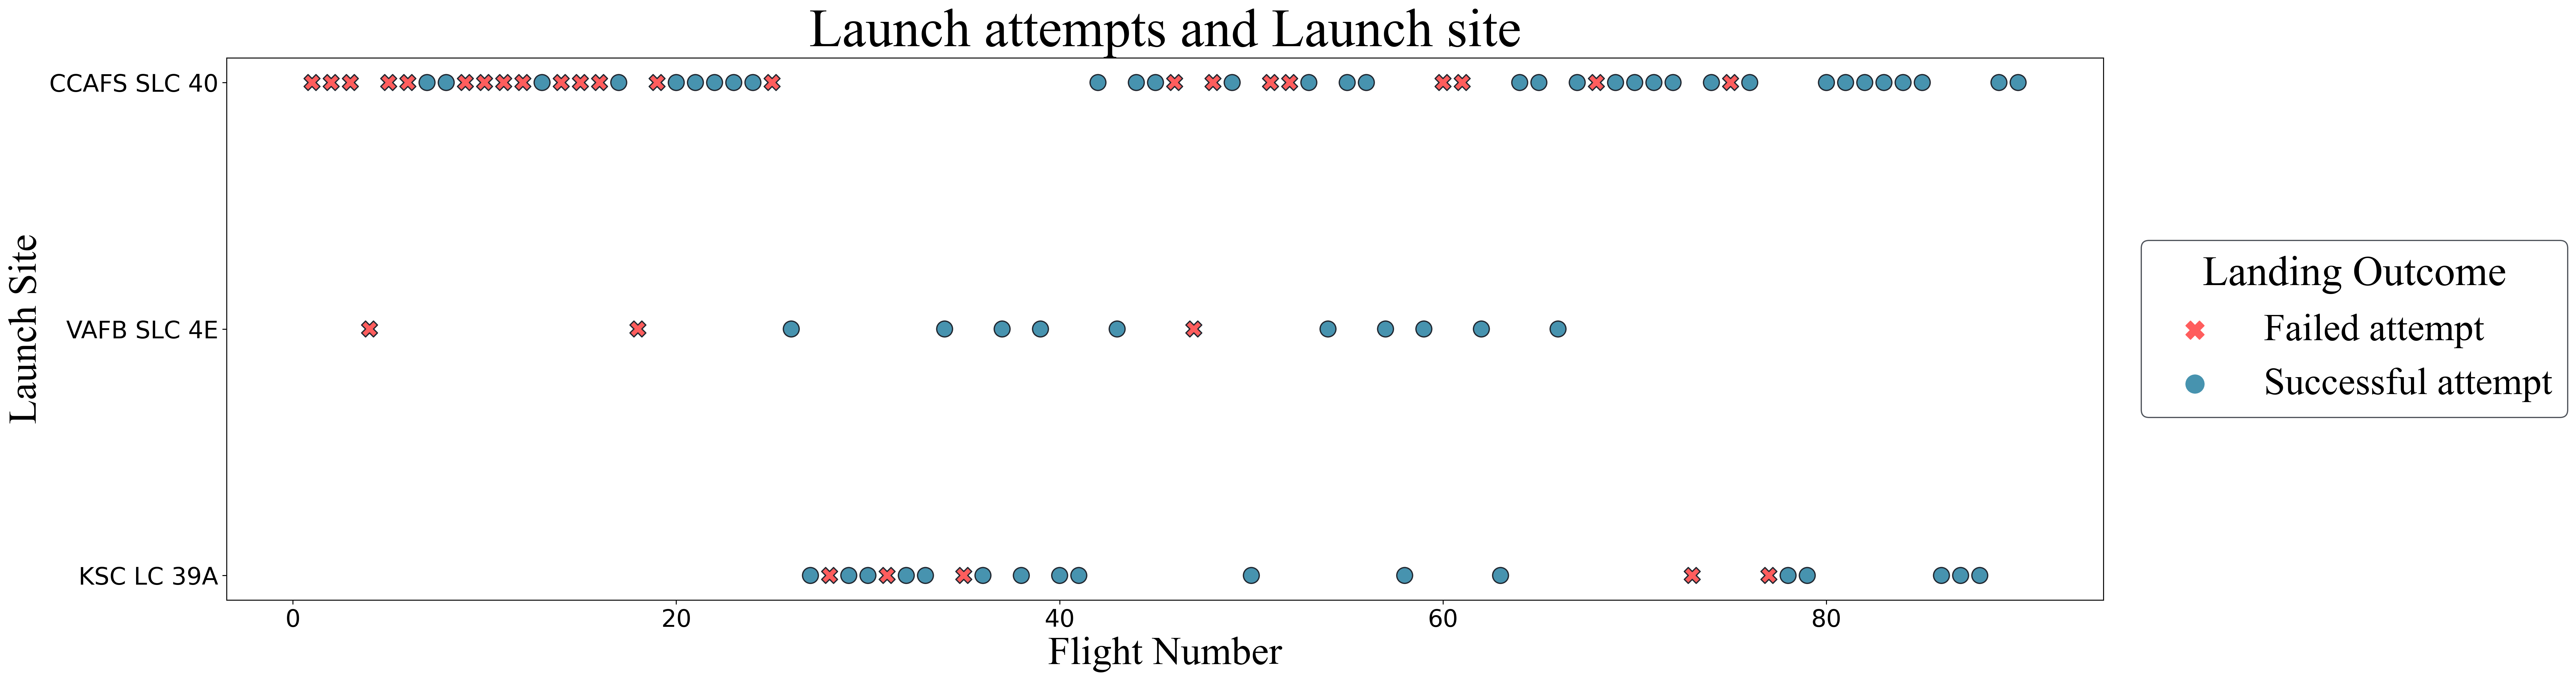

In [9]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value


fig, ax = plt.subplots(figsize=(30, 8), dpi=280)

# customizations
    ## font
axis_font = dict(size=33, family="times new roman")
legend_font = dict(size=32, family="times new roman")
legend_title_font = dict(size=35, family="times new roman")
title_font = dict(size=45, family="times new roman")
    ## colors
colors = {0:"#FF5D5D", 1:"#4793AF"}
    ## marker
markers = ["X", "o"]
    ## legend labels
hue_labels = {"0":"Failed attempt", "1":"Successful attempt"}


# plot
sns.scatterplot(data=df, x="FlightNumber", y="LaunchSite",
               hue="Class", style="Class", ax=ax,
               markers=markers, palette=colors, s=175,
               edgecolor="#222831")

# axis labels
ax.set_xlabel("Flight Number", fontdict=axis_font)
ax.set_ylabel("Launch Site", fontdict=axis_font)

# axis ticks
ax.set_yticklabels(labels=ax.get_yticklabels(), size=20)
ax.set_xticklabels(labels=ax.get_xticklabels(), size=20)

# plot legend
legend = ax.legend(markerscale=2.5, prop=legend_font,
         title="Landing Outcome", title_fontproperties=legend_title_font,
                  frameon=True, edgecolor="#222831",
                  loc="center left", bbox_to_anchor=(1.01, 0.5))
legend_labels = [hue_labels[label.get_text()] for label in legend.get_texts()] ## custom legend labels
for text, label in zip(legend.get_texts(), legend_labels): ## legend.get_texts() -> list of auto generated legend labels 
    text.set_text(label) ## change the legend label (from the auto generated one) to the custom legend label

# plot title
ax.set_title("Launch attempts and Launch site",
            fontdict=title_font)

fig.tight_layout();

# rname = r"D:\IBM Professional Certification\10_Data Science Capstone Project\4_EDA with Visualization\plots"
# fig.savefig(fname=rname+r"\flightNumber_launchSite.jpeg", bbox_inches="tight")

In [32]:
sites = df["LaunchSite"].value_counts().index.tolist()
launches = df["LaunchSite"].value_counts().values.tolist()

for site, total_launches in zip(sites, launches):
    success = len(df[(df["LaunchSite"] == site) & (df["Class"] == 1)])
    success_rate = round((success / total_launches)*100, ndigits=2)
    print(f"Success rate for launches from {site}: {success_rate}%\n")

Success rate for launches from CCAFS SLC 40: 60.0%

Success rate for launches from KSC LC 39A: 77.27%

Success rate for launches from VAFB SLC 4E: 76.92%



Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


#### Observations
|Launch site|Success Rate|
|:---:|:---:|
|CCAFS SLC 40|$$60.00\%$$|
|VAFB SLC 4E|$$76.92\%$$|
|KSC LC 39A|$$77.27\%$$|

1. Launches from **CCAFS SLC 40** have show **higher failure rate** compared to the other sites
2. Rockets launched from **KSC LC 39A** and **VAFB SLC 4E** seem to have much **higher rate of success**

---

### TASK 2: Visualize the relationship between Payload and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


C:\Users\rayjo\AppData\Local\Temp\ipykernel_6892\1301972278.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=ax.get_yticklabels(), size=20)
C:\Users\rayjo\AppData\Local\Temp\ipykernel_6892\1301972278.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=ax.get_xticklabels(), size=20)


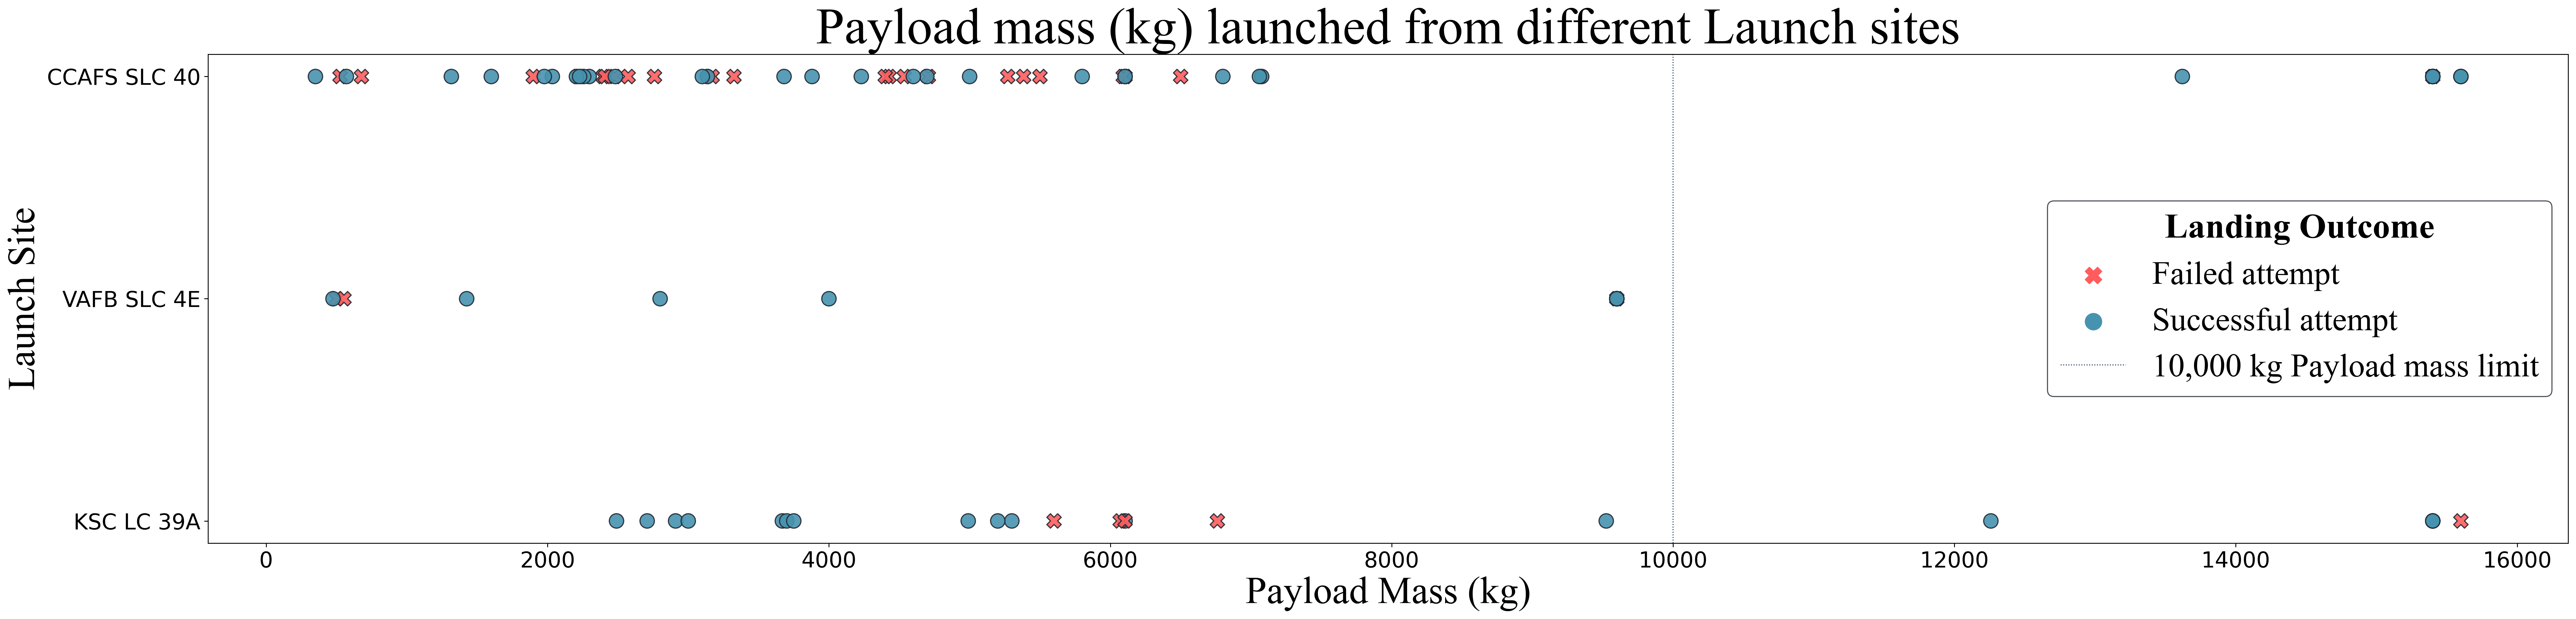

In [10]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value

fig, ax = plt.subplots(figsize=(33, 8), dpi=280)

# customizations
    ## font
axis_font = dict(size=35, family="times new roman")
legend_font = dict(size=30, family="times new roman")
legend_title_font = dict(size=32, family="times new roman", weight="bold")
title_font = dict(size=47, family="times new roman")
    ## colors
colors = {0:"#FF5D5D", 1:"#4793AF"}
    ## marker
markers = ["X", "o"]
    ## legend labels
hue_labels = {
    "0":"Failed attempt",
    "1":"Successful attempt",
    "10,000 kg Payload mass limit":"10,000 kg Payload mass limit"
            }


# plot
sns.scatterplot(data=df, x="PayloadMass", y="LaunchSite",
               hue="Class", style="Class", ax=ax,
               markers=markers, palette=colors, s=175,
               edgecolor="#222831", alpha=0.9)

# 5000kg payload mass indicator
ax.axvline(x=10000, linestyle=":", color="#00224D",
          label="10,000 kg Payload mass limit",
          linewidth=0.9, alpha=0.9)

# axis labels
ax.set_xlabel("Payload Mass (kg)", fontdict=axis_font)
ax.set_ylabel("Launch Site", fontdict=axis_font)

# axis ticks
ax.set_yticklabels(labels=ax.get_yticklabels(), size=20)
ax.set_xticklabels(labels=ax.get_xticklabels(), size=20)

# plot legend
legend = ax.legend(markerscale=2.5, prop=legend_font,
         title="Landing Outcome", title_fontproperties=legend_title_font,
                  frameon=True, edgecolor="#222831",
                  loc="best",
                  ncols=1)
legend_labels = [hue_labels[label.get_text()] for label in legend.get_texts()] ## custom legend labels
for text, label in zip(legend.get_texts(), legend_labels): ## legend.get_texts() -> list of auto generated legend labels 
    text.set_text(label) ## change the legend label (from the auto generated one) to the custom legend label



# plot title
ax.set_title("Payload mass (kg) launched from different Launch sites",
            fontdict=title_font)

fig.tight_layout();

# rname = r"D:\IBM Professional Certification\10_Data Science Capstone Project\4_EDA with Visualization\plots"
# fig.savefig(fname=rname+r"\launchSite_payloadMass.jpeg", bbox_inches="tight")

#### Observations
1. **VAFB SLC 4E** does not have any launches with **payload mass $>10,000\;kg$**
2. Launches from **KSC LC 39A** and **CCAFS SLC** are mostly for **payloads $<8,000\;kg$**
    - however, **KSC LC 39A** site has a much **better record** in terms of **landing success**

### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


In [12]:
# DATA GENERATION
# subset df
df_orbit = df[["Orbit", "Class"]]
# groupby
group_orbit = df_orbit.groupby(["Orbit"], as_index=False).agg({"Class":["mean", "count"]}).sort_values(by=("Class", "mean"), ascending=False)

# group_orbit

In [14]:
group_orbit

Orbit     Class      
               mean count
0   ES-L1  1.000000     1
1     GEO  1.000000     1
3     HEO  1.000000     1
9     SSO  1.000000     5
10   VLEO  0.857143    14
5     LEO  0.714286     7
6     MEO  0.666667     3
7      PO  0.666667     9
4     ISS  0.619048    21
2     GTO  0.518519    27
8      SO  0.000000     1

C:\Users\rayjo\AppData\Local\Temp\ipykernel_6892\1074902514.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(labels=ax1.get_yticklabels(), fontdict=tick_font_y)
C:\Users\rayjo\AppData\Local\Temp\ipykernel_6892\1074902514.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(labels=ax2.get_yticklabels(), fontdict=tick_font_y)


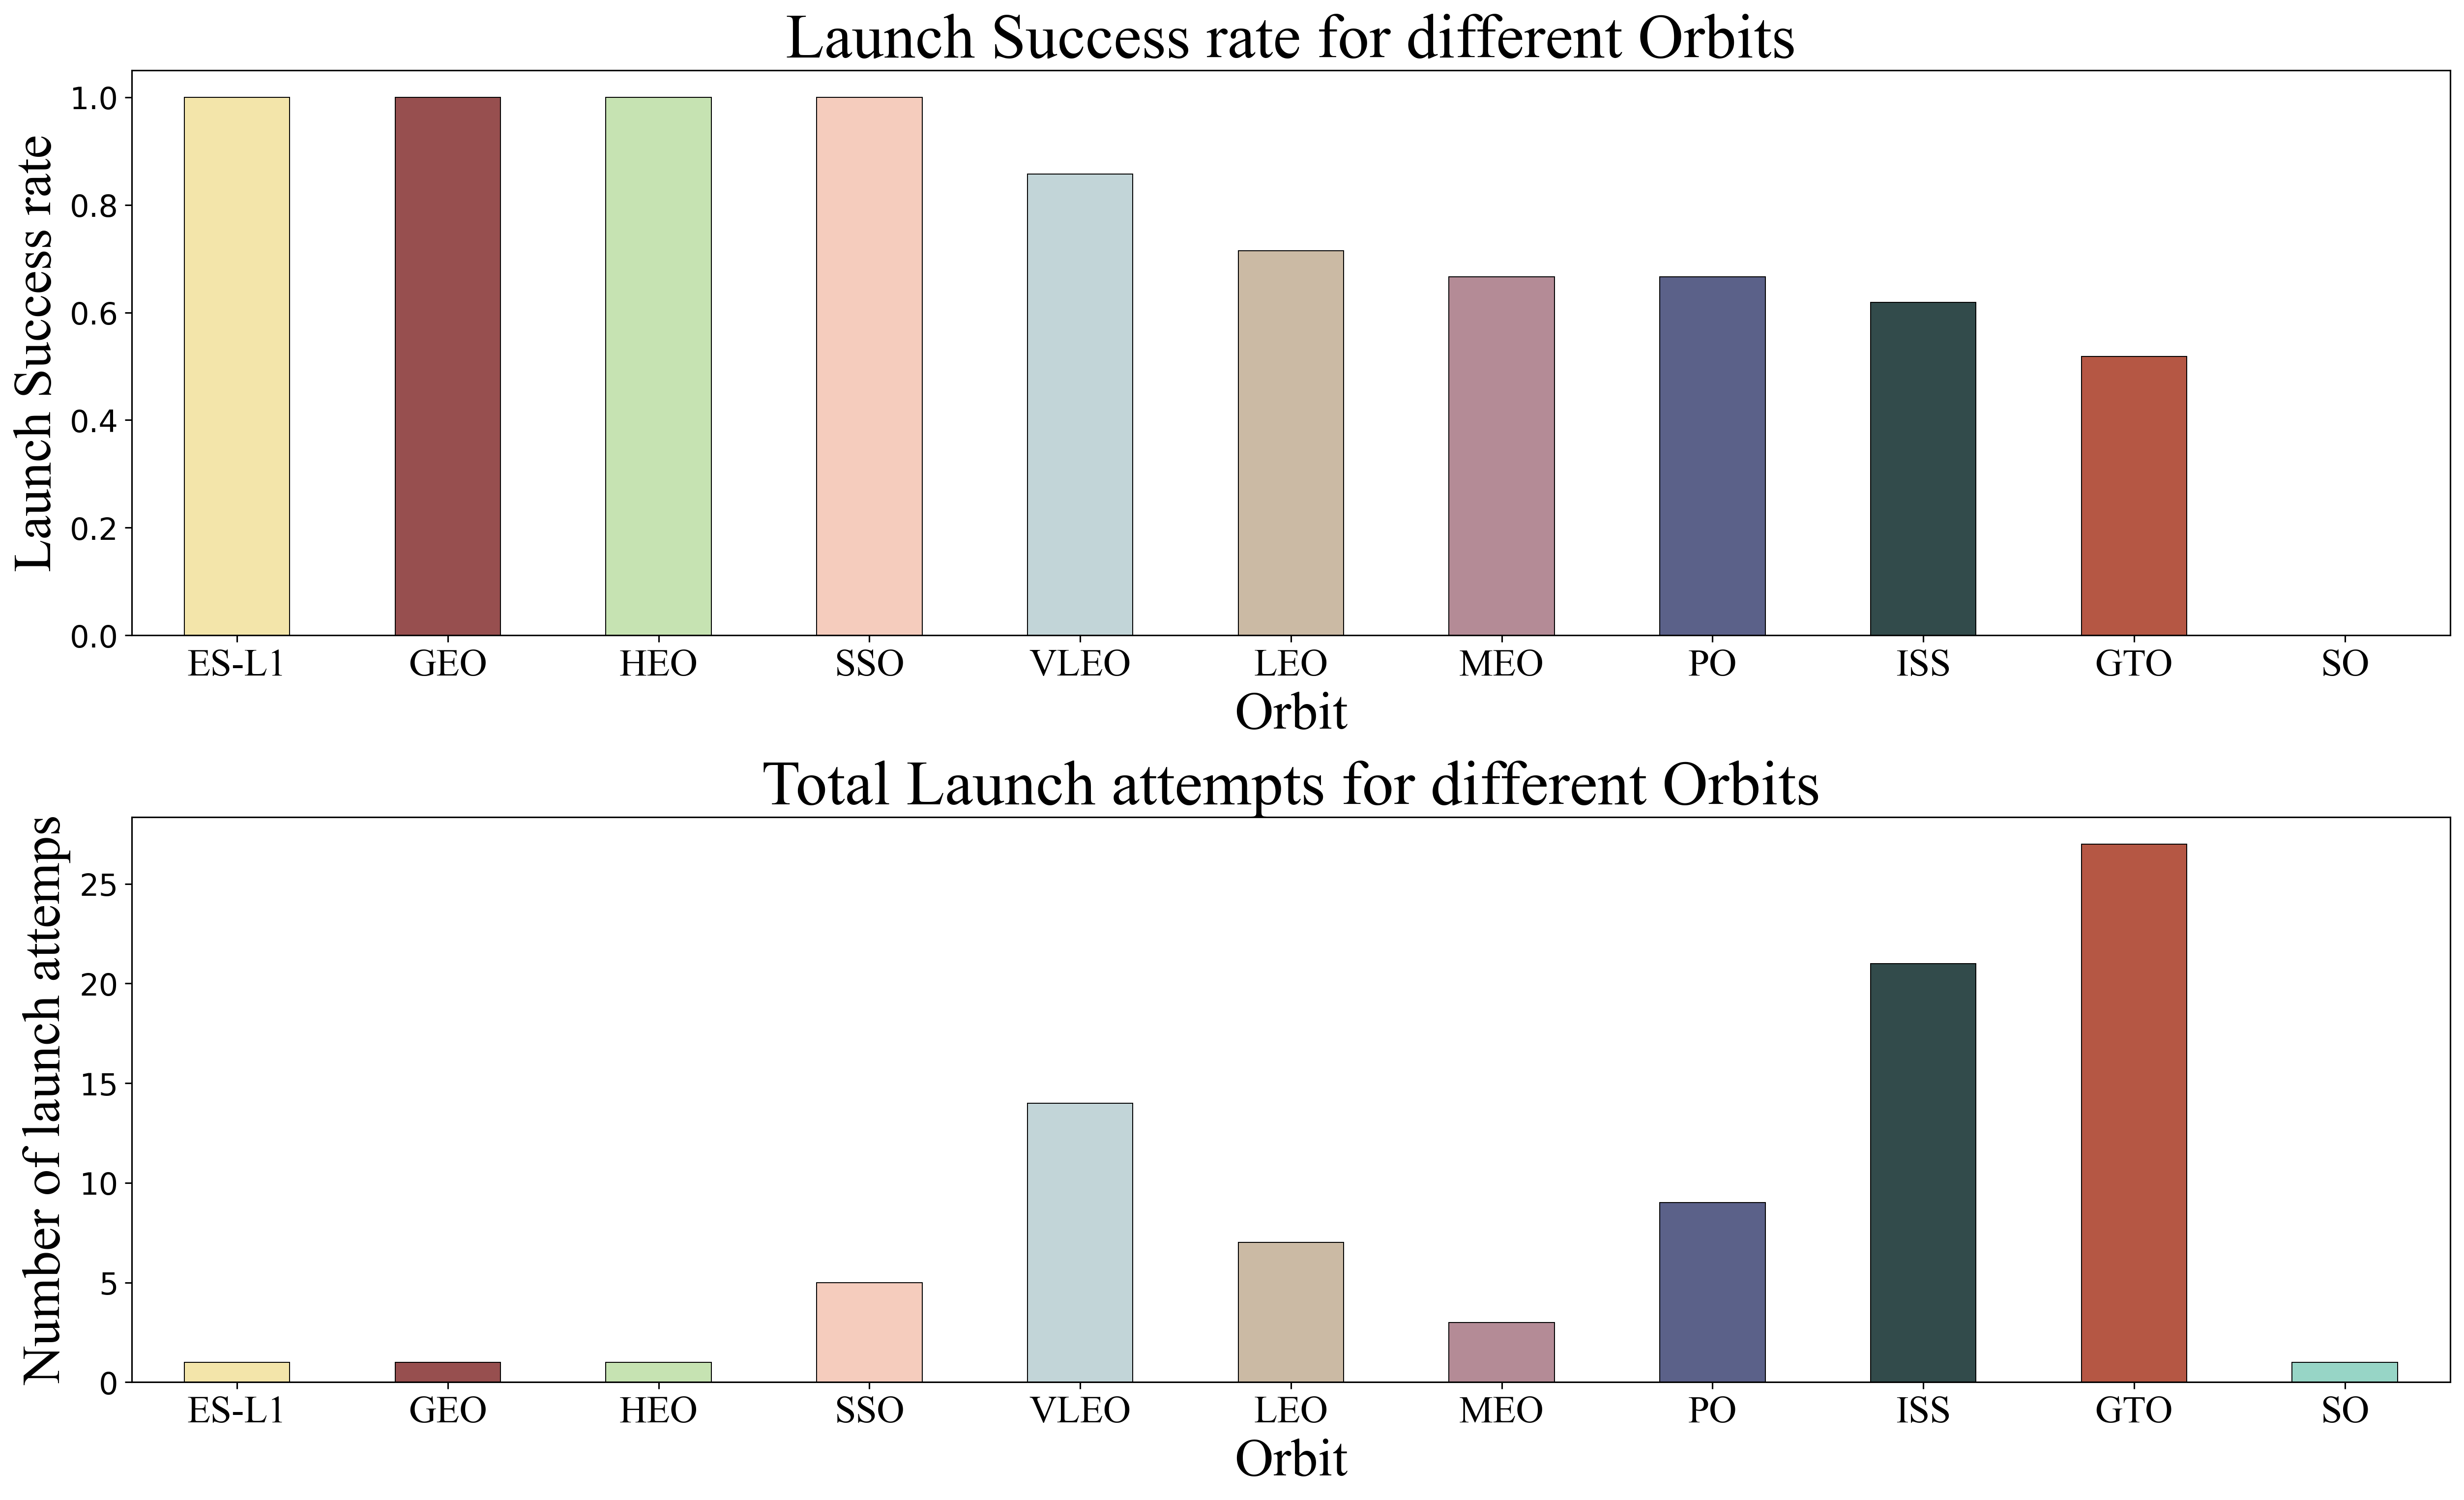

In [17]:
fig, ax = plt.subplots(figsize=(18, 11), dpi=280,
                      ncols=1, nrows=2)
ax1, ax2 = ax

# cutomizations
    ## colors
colors = [
    "#FFEC9E", "#A34343", "#C5EBAA", "#FEC7B4",
    "#BED7DC", "#D1BB9E", "#BB8493", "#535C91",
    "#2E4F4F", "#C84B31", "#8DDFCB"
]
    ## fonts
axis_font = dict(size=28, family="times new roman")
tick_font_x = dict(size=20, family="times new roman", weight=None)
tick_font_y = dict(size=16)
legend_font = dict(size=30, family="times new roman")
legend_title_font = dict(size=32, family="times new roman", weight="roman")
title_font = dict(size=33, family="times new roman")


# barplot 1
sns.barplot(x=group_orbit["Orbit"], y=group_orbit[("Class", "mean")], ax=ax1,
           palette=colors, edgecolor="black", linewidth=0.5,
           width=0.5)

# barplot 2
sns.barplot(x=group_orbit["Orbit"], y=group_orbit[("Class", "count")], ax=ax2,
           palette=colors, edgecolor="black", linewidth=0.5,
           width=0.5)

# axis labels

ax1.set_xlabel("Orbit", fontdict=axis_font)
ax1.set_ylabel("Launch Success rate", fontdict=axis_font)

ax2.set_xlabel("Orbit", fontdict=axis_font)
ax2.set_ylabel("Number of launch attemps", fontdict=axis_font)

# axis ticks

ax1.set_xticklabels(labels=ax1.get_xticklabels(), fontdict=tick_font_x)
ax1.set_yticklabels(labels=ax1.get_yticklabels(), fontdict=tick_font_y)

ax2.set_xticklabels(labels=ax2.get_xticklabels(), fontdict=tick_font_x)
ax2.set_yticklabels(labels=ax2.get_yticklabels(), fontdict=tick_font_y)

# title

ax1.set_title("Launch Success rate for different Orbits",
            fontdict=title_font)

ax2.set_title("Total Launch attempts for different Orbits",
            fontdict=title_font)

fig.tight_layout();

# rname = r"D:\IBM Professional Certification\10_Data Science Capstone Project\4_EDA with Visualization\plots"
# fig.savefig(fname=rname+r"\Orbit_successRate.jpeg", bbox_inches="tight")

Analyze the ploted bar chart try to find which orbits have high sucess rate.


#### Observations
1. **ES-L1**, **GEO**, **HEO**, **SSO** have a **perfect success rate** of $100\%$
    - however, they also have the **lowest number of launch attempts** which may explain the high success ratio
2. **Most launches** had target destination of **GTO**, however it has seen a **low success rate** of barely $\approx50\%$
3. Several launches were destined for **VLEO** and it has shown a relatively **high success rate** aswell
4. Only one of the launch attempts has **SO** as its target but the landing outcome was a failure

---

### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


C:\Users\rayjo\AppData\Local\Temp\ipykernel_6892\637825022.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=ax.get_xticklabels(), fontdict=tick_font_x)
C:\Users\rayjo\AppData\Local\Temp\ipykernel_6892\637825022.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=ax.get_yticklabels(), fontdict=tick_font_y)


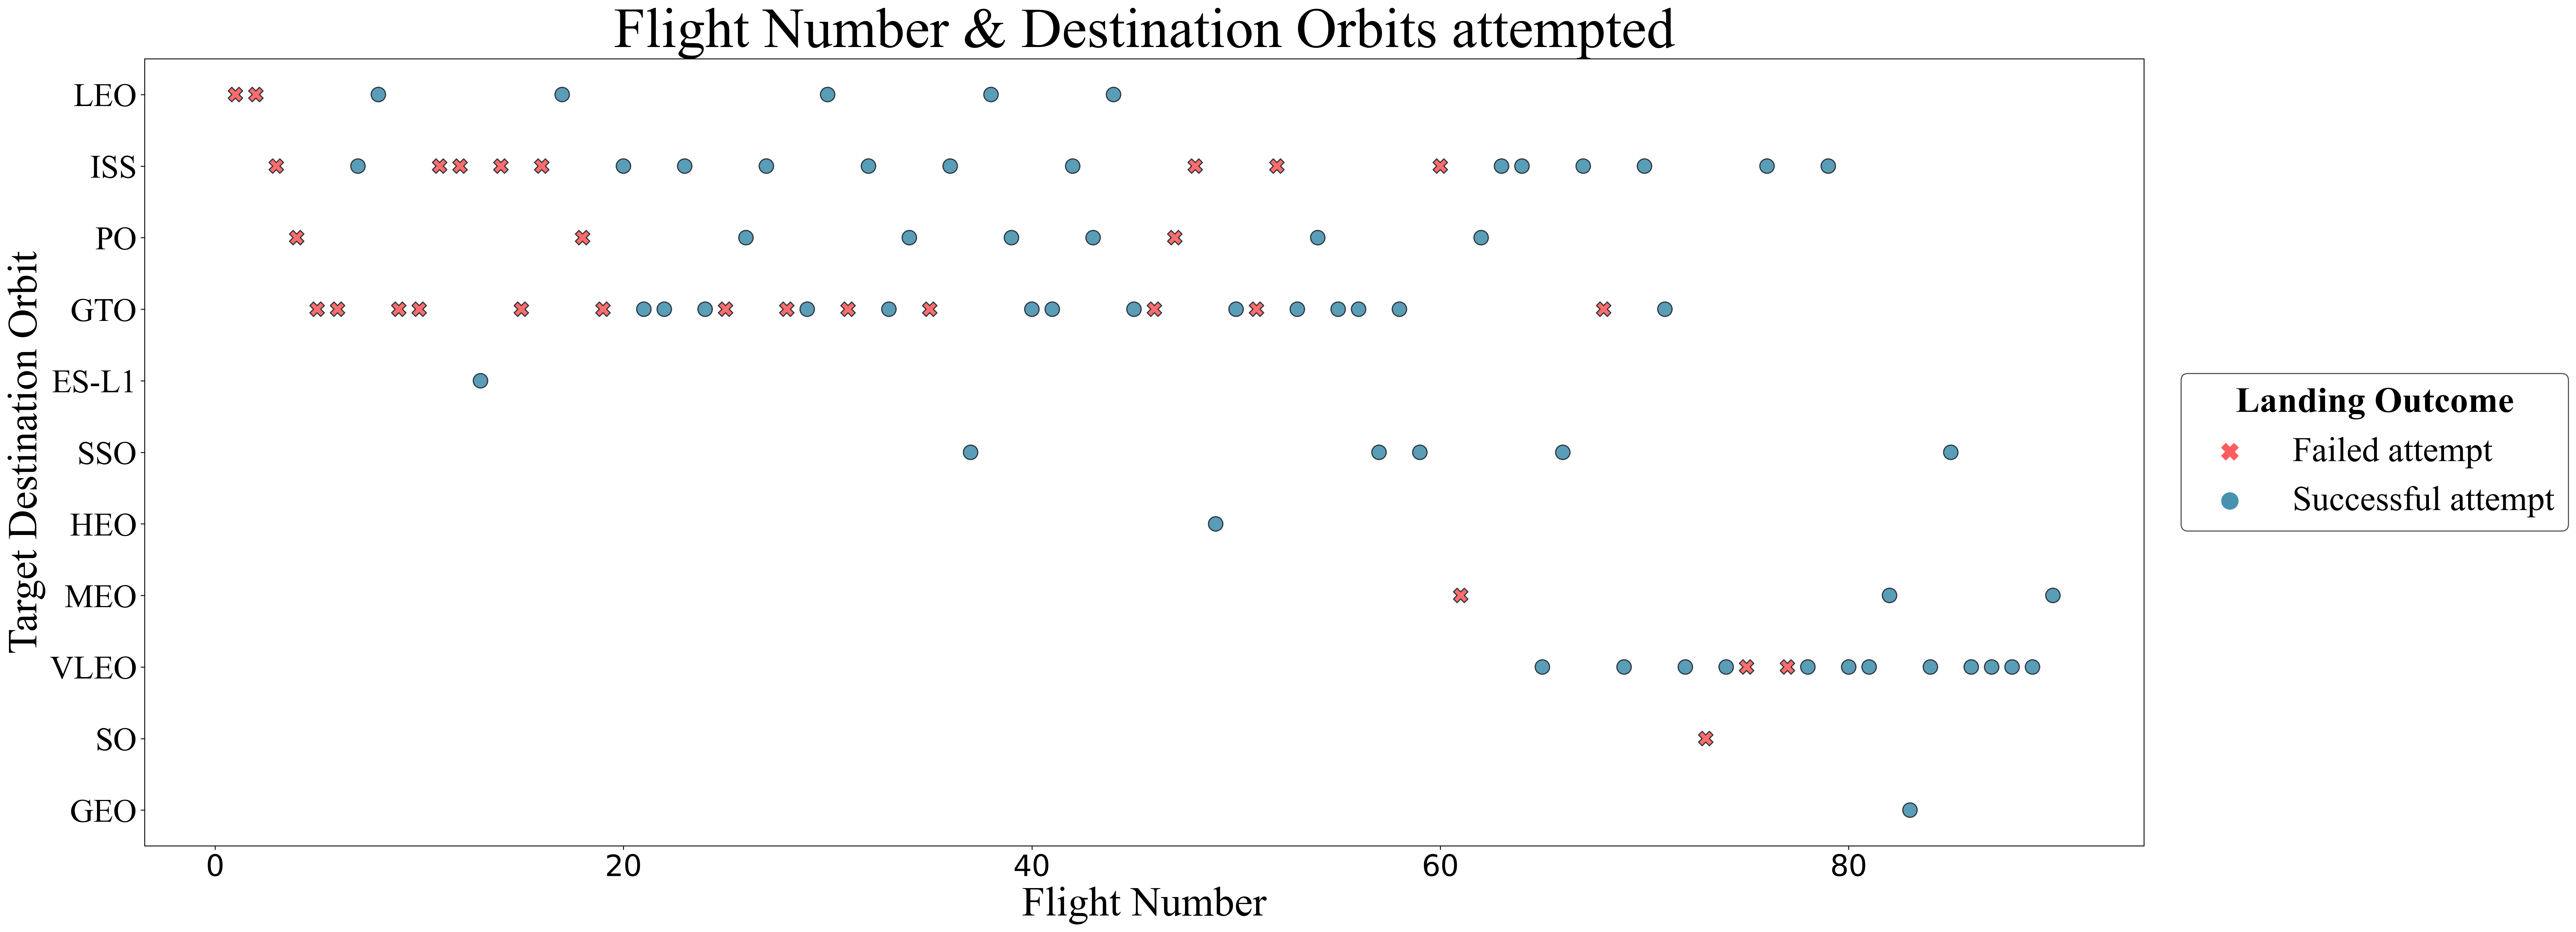

In [18]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value

fig, ax = plt.subplots(figsize=(33, 12), dpi=280)

# customizations
    ## font
axis_font = dict(size=38, family="times new roman")
tick_font_x = dict(size=27)
tick_font_y = dict(size=30, family="times new roman", weight=None)
legend_font = dict(size=32, family="times new roman")
legend_title_font = dict(size=33, family="times new roman", weight="bold")
title_font = dict(size=52, family="times new roman")
    ## colors
colors = {0:"#FF5D5D", 1:"#4793AF"}
    ## marker
markers = ["X", "o"]
    ## legend labels
hue_labels = {
    "0":"Failed attempt",
    "1":"Successful attempt"
            }


# plot
sns.scatterplot(data=df, x="FlightNumber", y="Orbit",
               hue="Class", style="Class", ax=ax,
               markers=markers, palette=colors, s=175,
               edgecolor="#222831", alpha=0.9)

# axis labels
ax.set_xlabel("Flight Number", fontdict=axis_font)
ax.set_ylabel("Target Destination Orbit", fontdict=axis_font)

# axis ticks
ax.set_xticklabels(labels=ax.get_xticklabels(), fontdict=tick_font_x)
ax.set_yticklabels(labels=ax.get_yticklabels(), fontdict=tick_font_y)

# plot legend
legend = ax.legend(markerscale=2.5, prop=legend_font,
         title="Landing Outcome", title_fontproperties=legend_title_font,
                  frameon=True, edgecolor="#222831",
                  loc="center left", bbox_to_anchor=(1.01, 0.5),
                  ncols=1)
legend_labels = [hue_labels[label.get_text()] for label in legend.get_texts()] ## custom legend labels
for text, label in zip(legend.get_texts(), legend_labels): ## legend.get_texts() -> list of auto generated legend labels 
    text.set_text(label) ## change the legend label (from the auto generated one) to the custom legend label



# plot title
ax.set_title("Flight Number & Destination Orbits attempted",
            fontdict=title_font)

fig.tight_layout();

# rname = r"D:\IBM Professional Certification\10_Data Science Capstone Project\4_EDA with Visualization\plots"
# fig.savefig(fname=rname+r"\flightNumber_Orbit.jpeg", bbox_inches="tight")

#### Observation
1. For **LEO** as **number of flights** (_experience of **Falcon 9**_) increases **success rate** of landing attempts also seem to increase. There maybe a correlation.
2. For **other orbits** such correlation between number of flights and success seems to be missing. Specially, for **GTO**, success and flight number seem to have no correlation at all.

---

### TASK  5: Visualize the relationship between Payload and Orbit type


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


C:\Users\rayjo\AppData\Local\Temp\ipykernel_6892\1624189836.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=ax.get_xticklabels(), fontdict=tick_font_x)
C:\Users\rayjo\AppData\Local\Temp\ipykernel_6892\1624189836.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=ax.get_yticklabels(), fontdict=tick_font_y)


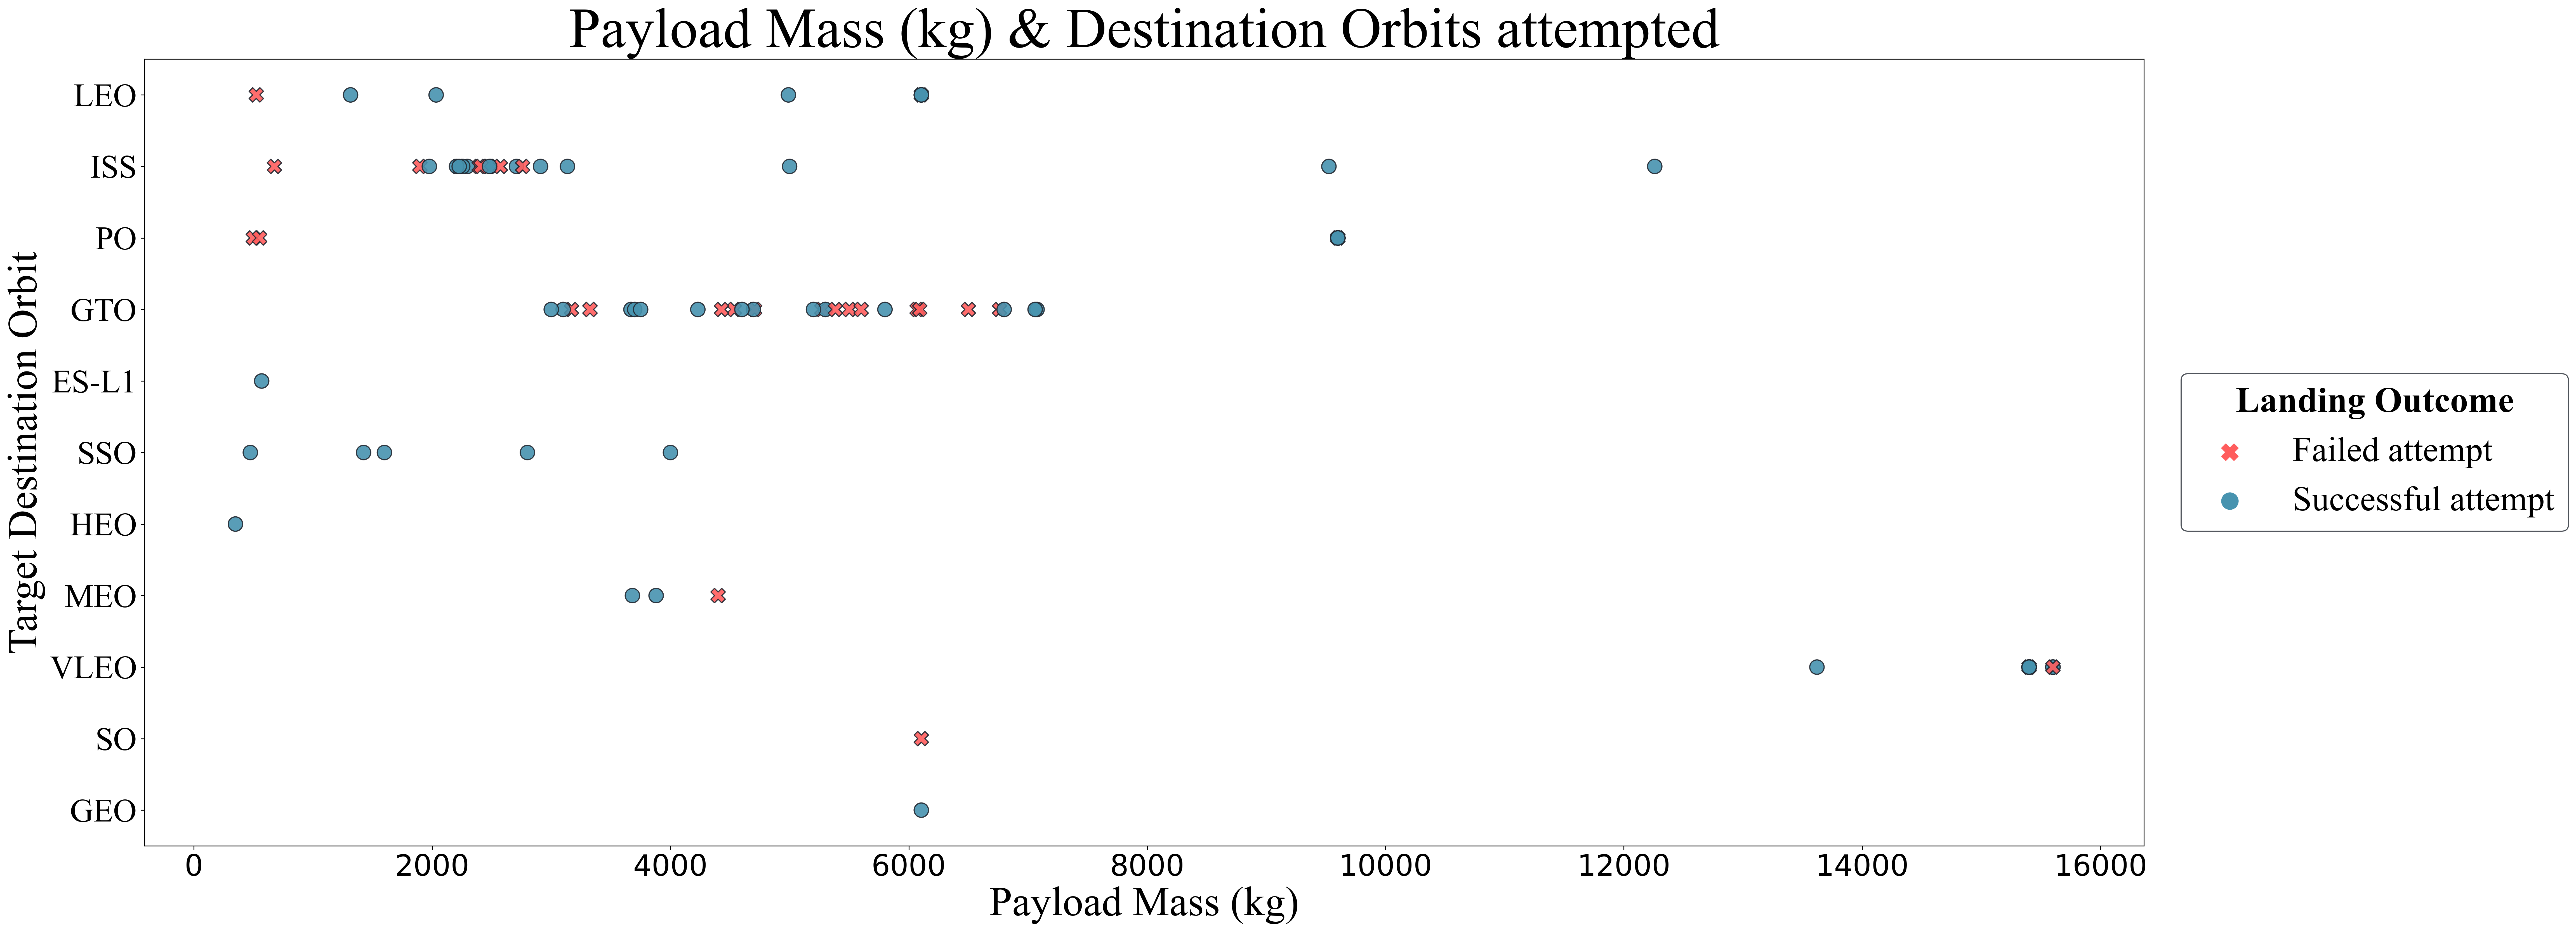

In [22]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value

fig, ax = plt.subplots(figsize=(33, 12), dpi=280)

# customizations
    ## font
axis_font = dict(size=38, family="times new roman")
tick_font_x = dict(size=27)
tick_font_y = dict(size=30, family="times new roman", weight=None)
legend_font = dict(size=32, family="times new roman")
legend_title_font = dict(size=33, family="times new roman", weight="bold")
title_font = dict(size=52, family="times new roman")
    ## colors
colors = {0:"#FF5D5D", 1:"#4793AF"}
    ## marker
markers = ["X", "o"]
    ## legend labels
hue_labels = {
    "0":"Failed attempt",
    "1":"Successful attempt"
            }


# plot
sns.scatterplot(data=df, x="PayloadMass", y="Orbit",
               hue="Class", style="Class", ax=ax,
               markers=markers, palette=colors, s=175,
               edgecolor="#222831", alpha=0.9)

# axis labels
ax.set_xlabel("Payload Mass (kg)", fontdict=axis_font)
ax.set_ylabel("Target Destination Orbit", fontdict=axis_font)

# axis ticks
ax.set_xticklabels(labels=ax.get_xticklabels(), fontdict=tick_font_x)
ax.set_yticklabels(labels=ax.get_yticklabels(), fontdict=tick_font_y)

# plot legend
legend = ax.legend(markerscale=2.5, prop=legend_font,
         title="Landing Outcome", title_fontproperties=legend_title_font,
                  frameon=True, edgecolor="#222831",
                  loc="center left", bbox_to_anchor=(1.01, 0.5),
                  ncols=1)
legend_labels = [hue_labels[label.get_text()] for label in legend.get_texts()] ## custom legend labels
for text, label in zip(legend.get_texts(), legend_labels): ## legend.get_texts() -> list of auto generated legend labels 
    text.set_text(label) ## change the legend label (from the auto generated one) to the custom legend label



# plot title
ax.set_title("Payload Mass (kg) & Destination Orbits attempted",
            fontdict=title_font)

fig.tight_layout();

# rname = r"D:\IBM Professional Certification\10_Data Science Capstone Project\4_EDA with Visualization\plots"
# fig.savefig(fname=rname+r"\payloadMass_Orbit.jpeg", bbox_inches="tight")

#### Observation
1. **Heaviest payloads** have been attemped for **VLEO** which is one of the nearest satellite orbits of Earth ($\leq 400\;km$).
    - this makes sense since the more heavy a payload is the greater volume of fuel is needed to fly per unit distance.
2. For relatively **heavy payloads**, success rate is higher for **Polar**, **LEO**, and **ISS** orbits.
3. Most launches have been planned for **GTO**. However,
    - **payload mass** for such missions have always been $<8,000\;kg$.
    - **success rate** of landing of rocket's first stage is on the lower side ($\approx 50\%$).
    
---

### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend. 


The function will help you get the year from the date:


In [ ]:
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
    

In [23]:
df.head(1)

FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   

     Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  ReusedCount  \
0  None None        1     False   False  False        NaN    1.0            0   

  Serial  Longitude   Latitude  Class  
0  B0003 -80.577366  28.561857      0

In [24]:
df.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class'],
      dtype='object')

In [25]:
df.dtypes

FlightNumber        int64
Date               object
BoosterVersion     object
PayloadMass       float64
Orbit              object
LaunchSite         object
Outcome            object
Flights             int64
GridFins             bool
Reused               bool
Legs                 bool
LandingPad         object
Block             float64
ReusedCount         int64
Serial             object
Longitude         float64
Latitude          float64
Class               int64
dtype: object

In [31]:
# DATA GENERATION Part 1
df2 = df.copy() ## copy df to avoid altering original

# create new `Year` column by extracting year data from `Date` column
df2["Year"] = df2["Date"].apply(func=lambda value: (value.split("-"))[0])

# df2.head(1)

In [32]:
df2["Outcome"].unique()

array(['None None', 'False Ocean', 'True Ocean', 'False ASDS',
       'None ASDS', 'True RTLS', 'True ASDS', 'False RTLS'], dtype=object)

In [33]:
# DATA GENERATION Part 2

# subset dataset
subset_year = df2[["Year", "Class"]]
# groupby year
group_year = subset_year.groupby(["Year"], as_index=False).mean()
# create new column `Success Rate (%)`
group_year["Success Rate (%)"] = np.round((group_year["Class"]*100), decimals=2)

group_year

Year     Class  Success Rate (%)
0  2010  0.000000              0.00
1  2012  0.000000              0.00
2  2013  0.000000              0.00
3  2014  0.333333             33.33
4  2015  0.333333             33.33
5  2016  0.625000             62.50
6  2017  0.833333             83.33
7  2018  0.611111             61.11
8  2019  0.900000             90.00
9  2020  0.842105             84.21

C:\Users\rayjo\AppData\Local\Temp\ipykernel_6892\2750377402.py:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=ax.get_yticklabels(), fontdict=tick_font_y)


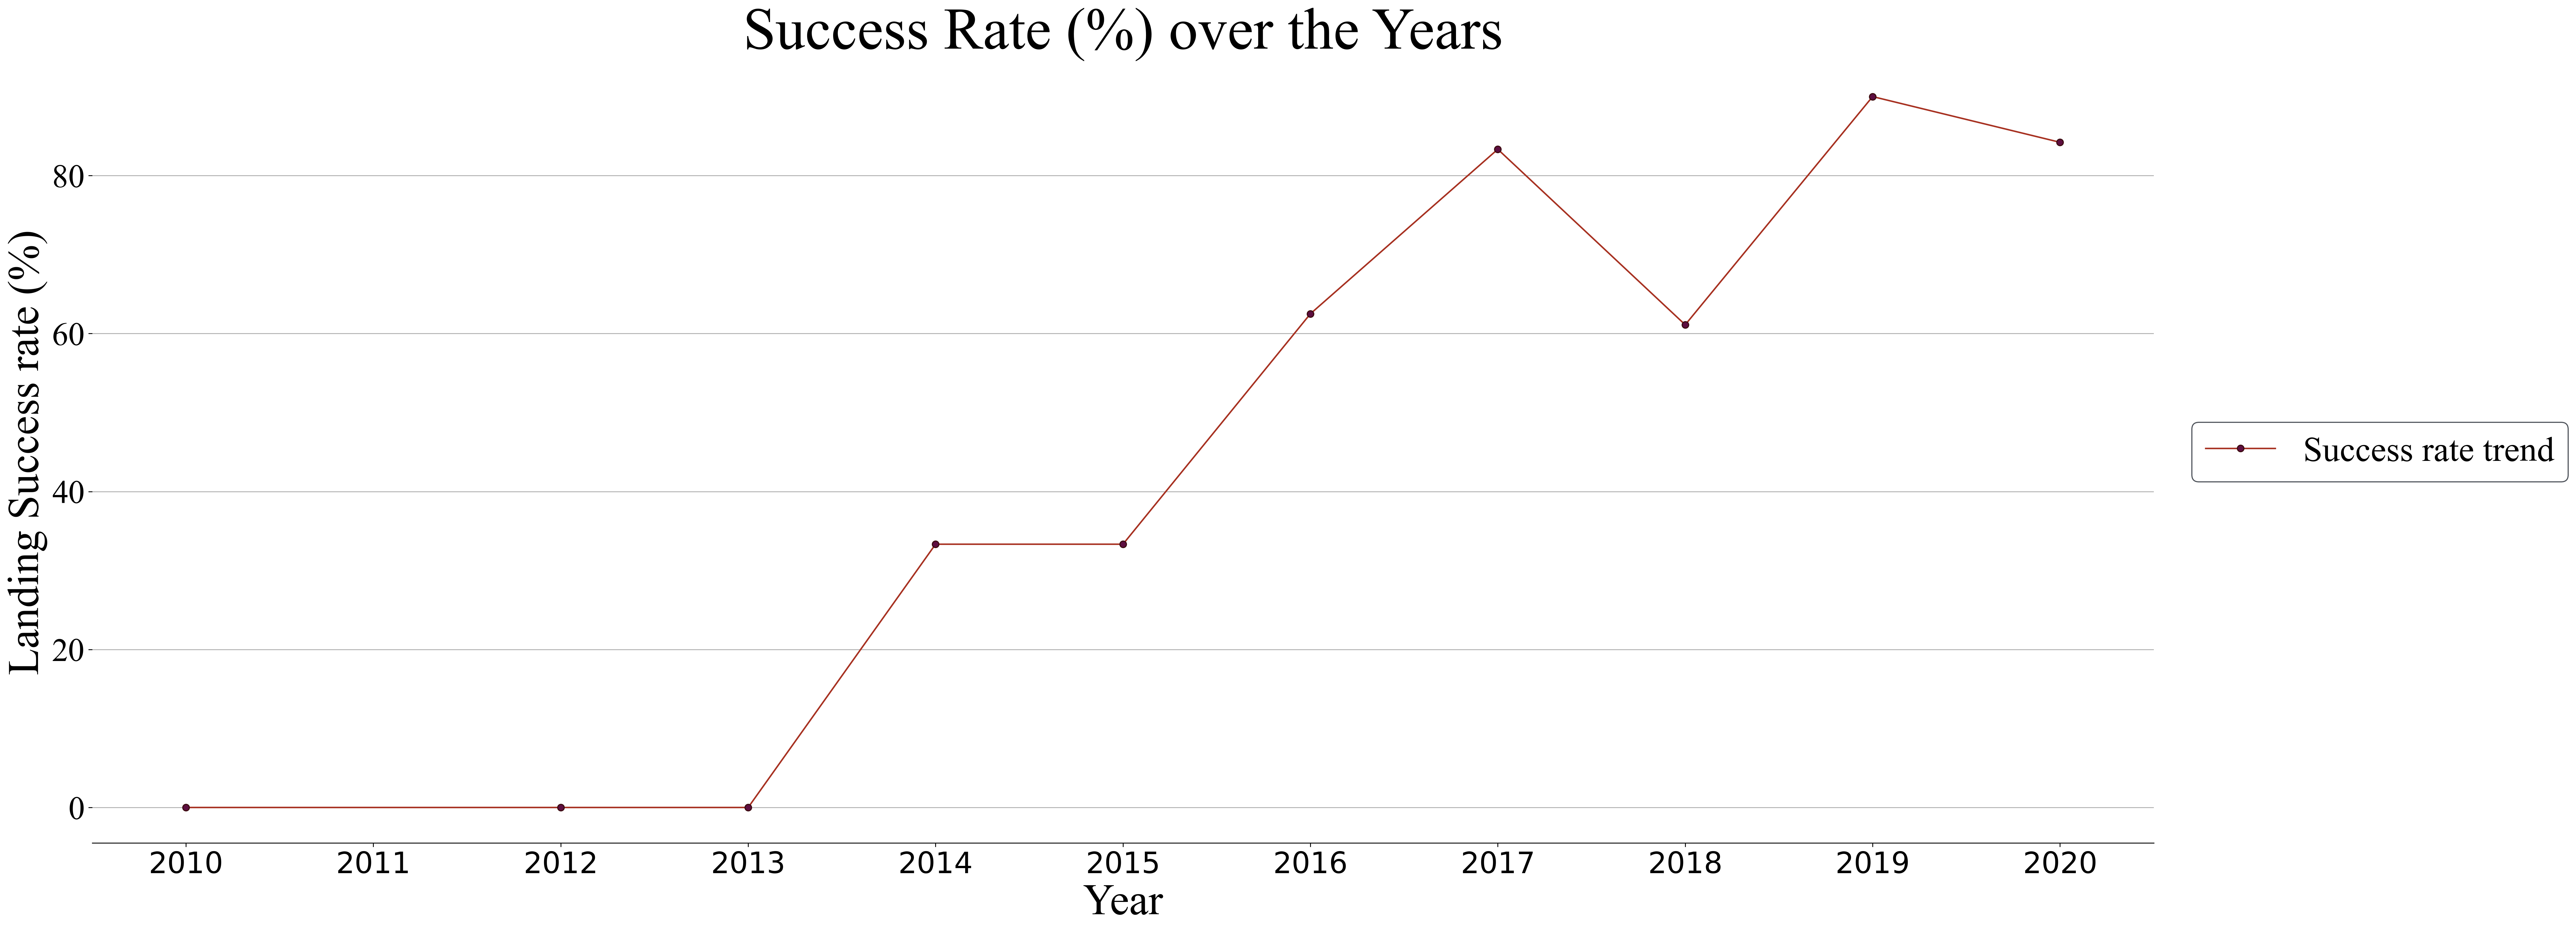

In [48]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate

fig, ax = plt.subplots(figsize=(33, 12), dpi=280)

# customizations
    ## font
axis_font = dict(size=40, family="times new roman")
tick_font_x = dict(size=27)
tick_font_y = dict(size=30, family="times new roman", weight=None)
legend_font = dict(size=32, family="times new roman")
legend_title_font = dict(size=33, family="times new roman", weight="bold")
title_font = dict(size=54, family="times new roman")

# values to plot
xvals = group_year["Year"].map(arg=int)
yvals = group_year["Success Rate (%)"]

# plot
ax.plot(xvals, yvals, label="Success rate trend",
       zorder=10, linestyle="-", marker="o",
       color="#A73121", linewidth=1.4,
       markerfacecolor="#5D0E41", markeredgecolor="#3D0C11")

# axis labels
ax.set_xlabel("Year", fontdict=axis_font)
ax.set_ylabel("Landing Success rate (%)", fontdict=axis_font)

# axis ticks
xtick_marks = list(map(int, range(2010, 2021)))
xtick_labels = list(map(str, range(2010, 2021)))
ax.set_xticks(ticks=xtick_marks, labels=xtick_labels, fontproperties=tick_font_x)
ax.set_yticklabels(labels=ax.get_yticklabels(), fontdict=tick_font_y)

# plot legend
legend = ax.legend(prop=legend_font, title_fontproperties=legend_title_font,
                  frameon=True, edgecolor="#222831",
                  loc="center left", bbox_to_anchor=(1.01, 0.5),
                  ncols=1)


# plot title
ax.set_title("Success Rate (%) over the Years",
            fontdict=title_font)

ax.spines[["top", "right", "left"]].set_visible(False)

ax.grid(axis="y")

fig.tight_layout();

# rname = r"D:\IBM Professional Certification\10_Data Science Capstone Project\4_EDA with Visualization\plots"
# fig.savefig(fname=rname+r"\Year_successRate.jpeg", bbox_inches="tight")

#### Observation
1. Spacex saw **no success** in landing back the rocket **until year 2013**.
2. Success rate kept **increasing** between year **2013 and 2017**.
    - year **2014 to 2015** remained a **stable year** (neither improvement nor deterioration)
3. While the **general trend** has been **upward**, success rate **fluctuated** between year **2017 and 2020**.
    - success rate **dipped** between year 2017 and 2018, and again between year 2019 and 2020

---

## Features Engineering 


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [53]:
# list of relevant features to retain
features_cols = [
    'FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite',
    'Flights', 'GridFins', 'Reused', 'Legs',
    'LandingPad', 'Block', 'ReusedCount', 'Serial'
                ]

# new dataframe with only relevant features
features = df[features_cols]

# view new dataframe
features.head()

FlightNumber  PayloadMass Orbit  ... Block  ReusedCount  Serial
0             1  6104.959412   LEO  ...   1.0            0   B0003
1             2   525.000000   LEO  ...   1.0            0   B0005
2             3   677.000000   ISS  ...   1.0            0   B0007
3             4   500.000000    PO  ...   1.0            0   B1003
4             5  3170.000000   GTO  ...   1.0            0   B1004

[5 rows x 12 columns]

 ### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [54]:
# HINT: Use get_dummies() function on the categorical columns

## columns to one-hot encode
categorical_cols = [
    "Orbit", "LaunchSite",
    "LandingPad", "Serial"
]

## one-hot encode and store in a new dataframe
features_one_hot = pd.get_dummies(data=features, columns=categorical_cols, dtype=int)

## adjust pandas viewing options
pd.set_option("display.max_columns", 0) ## show all columns of dataframe

## view first five rows of one-hot encoded dataframe
features_one_hot.head(5)

FlightNumber  PayloadMass  Flights  ...  Serial_B1059  Serial_B1060  Serial_B1062
0             1  6104.959412        1  ...             0             0             0
1             2   525.000000        1  ...             0             0             0
2             3   677.000000        1  ...             0             0             0
3             4   500.000000        1  ...             0             0             0
4             5  3170.000000        1  ...             0             0             0

[5 rows x 80 columns]

### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [59]:
# HINT: use astype function

# convert dataframe features to float64
features_one_hot = features_one_hot.astype(dtype="float64")

# features_one_hot.dtypes

#### Comments on Final `features_one_hot` DataFrame
1. All **categorical features** have been **one-hot encoded**
    - data can now be used for training a **machine learning model**
2. All features/columns now have **datatype** `float64`

We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range. 


<code>features_one_hot.to_csv('dataset_part_3.csv', index=False)</code>


In [60]:
# # export final dataset as csv file

# ## local path
# path = r"D:\IBM Professional Certification\10_Data Science Capstone Project\4_EDA with Visualization\data\dataset_part_3.csv"

# # save as csv
# features_one_hot.to_csv(path, index=False)